<a href="https://colab.research.google.com/github/AndreiAf02/LSTM_Fourier_Stock_Prediction/blob/main/GSPTSE_Performance_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
stock_symbol = '^GSPTSE'
start_date = '2024-01-01'
end_date = '2026-01-15'
interval_val='1d'

stock = yf.Ticker(stock_symbol)
hist = stock.history(start=start_date, end=end_date, interval=interval_val)

colors_vol = np.where(hist['Close']>=hist['Open'], 'green', 'red')

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=(str(stock_symbol),
                                                                       'Volume'),
                          row_width=[0.3, 0.7], vertical_spacing=0.05)
fig.update_layout(autosize=False, width=1600, height=1000)


fig = fig.add_trace(go.Candlestick(x=hist.index, open=hist['Open'],
                                  high = hist['High'], low = hist['Low'],
                                  close = hist['Close'], name='Price'), row=1, col=1)

fig = fig.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume', marker_color=colors_vol), row=2, col=1)


fig.update_xaxes(rangeslider_visible=False, row=1, col=1)
fig.update_xaxes(rangeslider_visible=True, row=2, col=1)

fig.show()

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/LSTM_Fourier_Stock_Prediction/refs/heads/main/GSPTSE/'

In [3]:
simple_data = pd.read_csv(path_to_data+'Simple_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_data = pd.read_csv(path_to_data+'Corrected_Init_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)


simple_fwr_data = pd.read_csv(path_to_data+'Simple_FWR_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_fwr_data = pd.read_csv(path_to_data+'Corrected_Init_FWR_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)

simple_lin_data = pd.read_csv(path_to_data+'Simple_Lin_Drift_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_lin_data = pd.read_csv(path_to_data+'Corrected_Init_Lin_Drift_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)

simple_fej_data = pd.read_csv(path_to_data+'Simple_Fej_Drift_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_fej_data = pd.read_csv(path_to_data+'Corrected_Init_Fej_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)


simple_lan_data = pd.read_csv(path_to_data+'Simple_Lanczos_Drift_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_lan_data = pd.read_csv(path_to_data+'Corrected_Init_Lanczos_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)


simple_pad_data = pd.read_csv(path_to_data+'Simple_Padding_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)
corrected_init_pad_data = pd.read_csv(path_to_data+'Corrected_Init_Padding_LSTM_NRMSE_^GSPTSE.csv', sep=",", header=0)

simple_fwr_data

,Unnamed: 0,Open,High,Low,Close,Volume
0,0,1.110093,1.197596,1.179794,1.214889,0.164582
1,1,1.147538,1.240503,0.821831,1.057333,0.164936
2,2,2.062003,2.139608,2.020273,1.970905,0.153240
3,3,0.974880,1.138749,1.030260,1.098847,0.200505
4,4,0.832329,0.914168,0.725497,0.696431,0.153040
...,...,...,...,...,...,...
95,95,0.600468,0.644968,0.644524,0.591383,0.153786
96,96,0.518241,0.579966,0.380872,0.489300,0.161595
97,97,1.907140,1.969207,1.857699,1.902014,0.156712
98,98,0.311091,0.906101,0.523432,0.211685,0.153250


,0
Open,0.934761
High,0.953449
Low,0.896942
Close,0.911876
Volume,0.170568


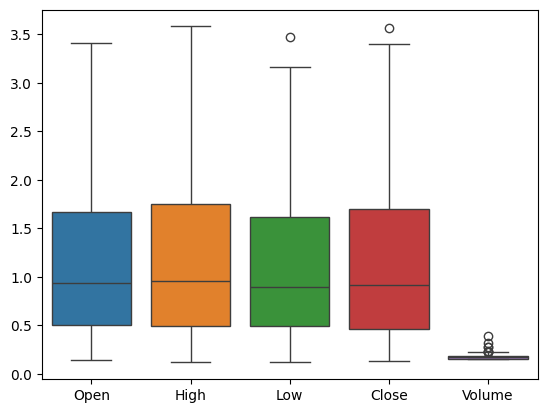

In [4]:
sns.boxplot(simple_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

,0
Open,0.771528
High,0.743266
Low,0.764787
Close,0.695851
Volume,0.159381


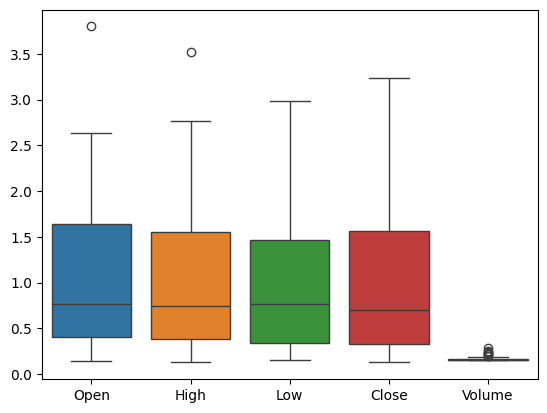

In [5]:
sns.boxplot(simple_pad_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_pad_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

,0
Open,0.844583
High,0.904356
Low,0.776312
Close,0.815255
Volume,0.159076


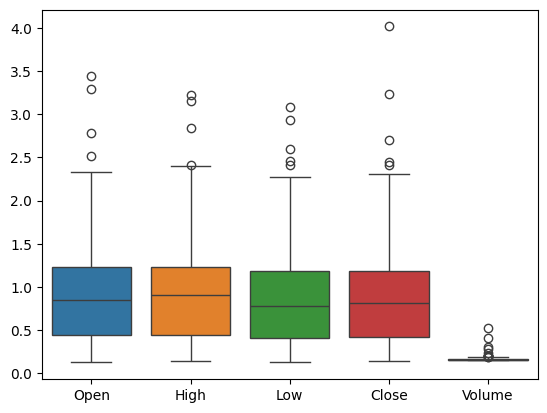

In [6]:
sns.boxplot(simple_fwr_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_fwr_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

,0
Open,0.681330
High,0.711604
Low,0.709961
Close,0.733543
Volume,0.155031


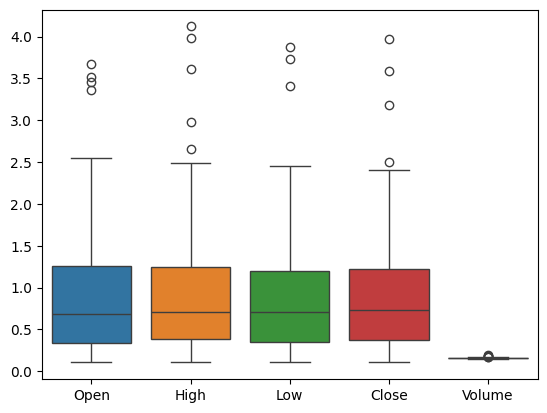

In [7]:
sns.boxplot(simple_fej_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_fej_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

,0
Open,0.707104
High,0.746230
Low,0.718414
Close,0.714736
Volume,0.158688


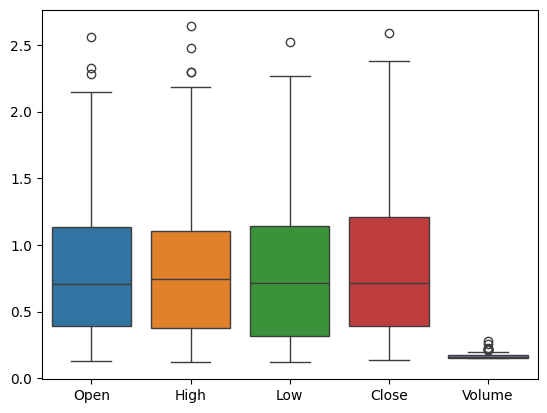

In [8]:
sns.boxplot(simple_lan_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_lan_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

,0
Open,0.483984
High,0.475649
Low,0.491014
Close,0.469697
Volume,0.156299


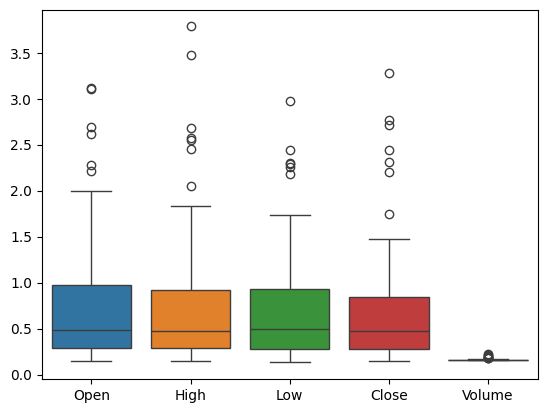

In [9]:
sns.boxplot(simple_lin_data[['Open', 'High', 'Low', 'Close', 'Volume']])
simple_lin_data[['Open', 'High', 'Low', 'Close', 'Volume']].median()

## LSTM Performance:


------------------------- Open -------------------------
Simple     0.934761
Padding    0.771528
FWR        0.844583
Fejer      0.681330
Lanczos    0.707104
Linear     0.483984
dtype: float64


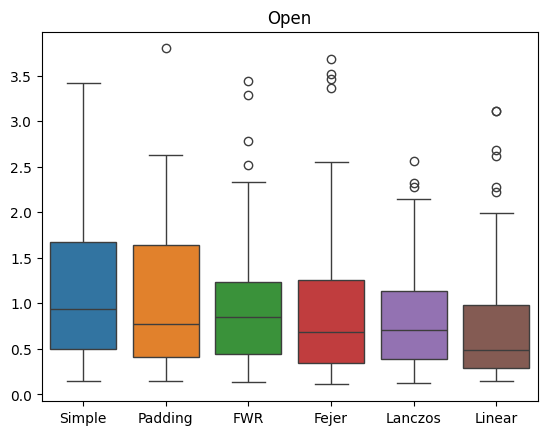


------------------------- High -------------------------
Simple     0.953449
Padding    0.743266
FWR        0.904356
Fejer      0.711604
Lanczos    0.746230
Linear     0.475649
dtype: float64


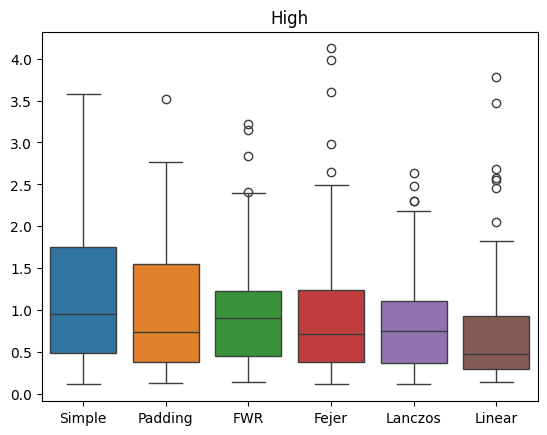


------------------------- Low -------------------------
Simple     0.896942
Padding    0.764787
FWR        0.776312
Fejer      0.709961
Lanczos    0.718414
Linear     0.491014
dtype: float64


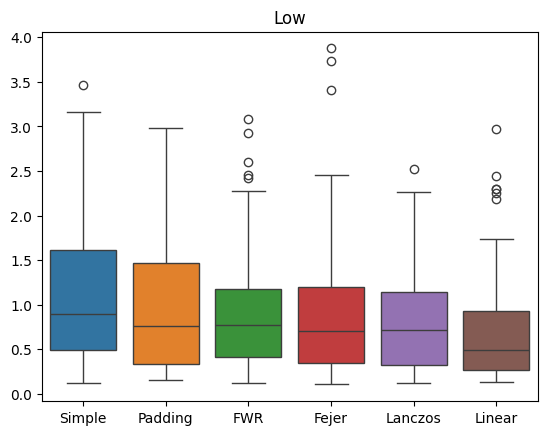


------------------------- Close -------------------------
Simple     0.911876
Padding    0.695851
FWR        0.815255
Fejer      0.733543
Lanczos    0.714736
Linear     0.469697
dtype: float64


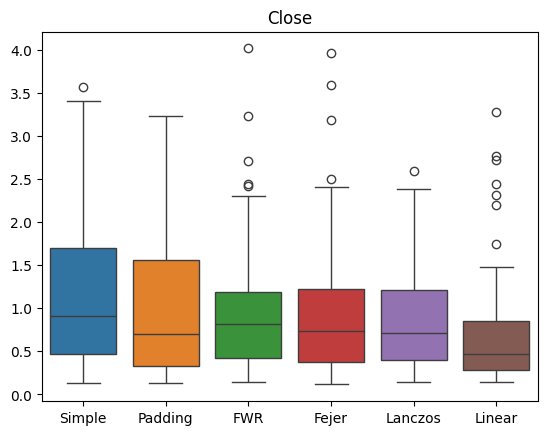


------------------------- Volume -------------------------
Simple     0.170568
Padding    0.159381
FWR        0.159076
Fejer      0.155031
Lanczos    0.158688
Linear     0.156299
dtype: float64


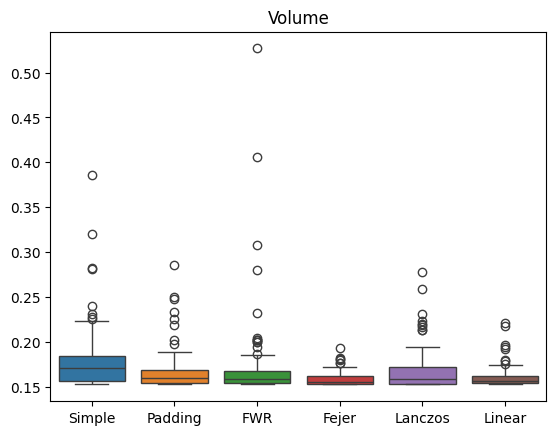

In [ ]:
col_list = ['Open', 'High', 'Low', 'Close', 'Volume']


for col in col_list:
  perf_df = pd.DataFrame()
  data_simple = simple_data[col]
  data_fwr = simple_fwr_data[col]
  data_lin = simple_lin_data[col]
  data_fej = simple_fej_data[col]
  data_lan = simple_lan_data[col]
  data_pad = simple_pad_data[col]

  perf_df['Simple'] = data_simple
  perf_df['Padding'] = data_pad
  perf_df['FWR'] = data_fwr
  perf_df['Fejer'] = data_fej
  perf_df['Lanczos'] = data_lan
  perf_df['Linear'] = data_lin

  print('')
  print('-'*25, col, '-'*25)
  print(perf_df.median())

  plt.plot()
  plt.title(col)
  sns.boxplot(perf_df)
  plt.show()





------------------------- Open  (Corrected Init) -------------------------
Simple     0.728092
Padding    0.599501
FWR        0.533496
Fejer      0.601621
Lanczos    0.578740
Linear     0.340723
dtype: float64


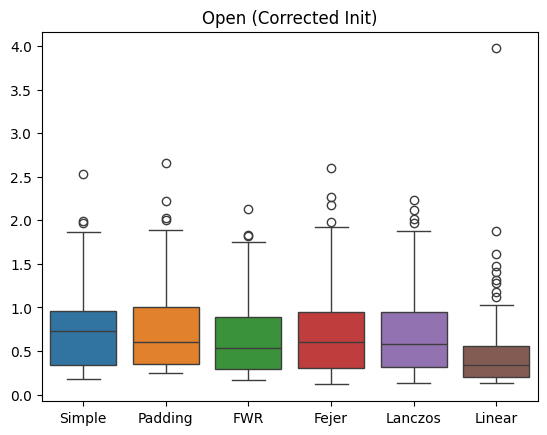


------------------------- High  (Corrected Init) -------------------------
Simple     0.723733
Padding    0.670731
FWR        0.552513
Fejer      0.617335
Lanczos    0.612703
Linear     0.324056
dtype: float64


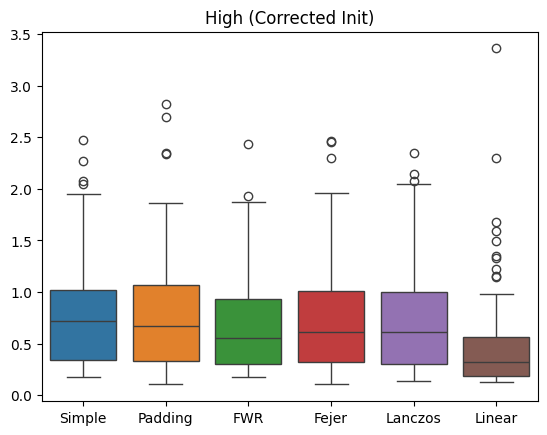


------------------------- Low  (Corrected Init) -------------------------
Simple     0.671896
Padding    0.617658
FWR        0.504742
Fejer      0.595521
Lanczos    0.569238
Linear     0.334048
dtype: float64


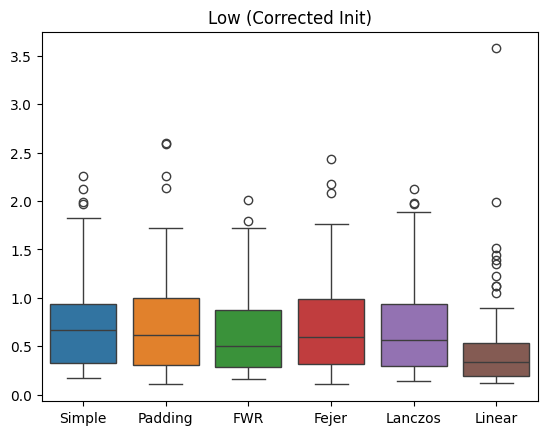


------------------------- Close  (Corrected Init) -------------------------
Simple     0.720355
Padding    0.668333
FWR        0.506451
Fejer      0.642109
Lanczos    0.587761
Linear     0.333103
dtype: float64


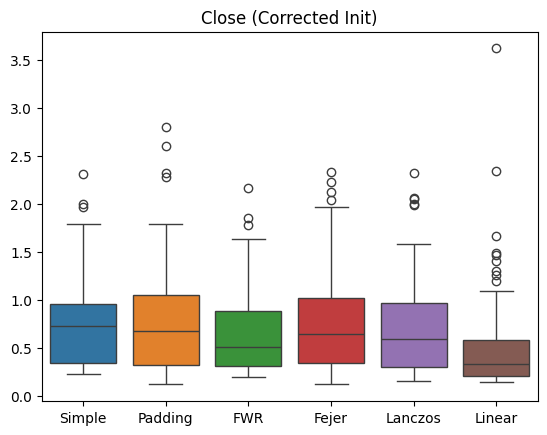


------------------------- Volume  (Corrected Init) -------------------------
Simple     0.202275
Padding    0.162673
FWR        0.200447
Fejer      0.153273
Lanczos    0.177437
Linear     0.157083
dtype: float64


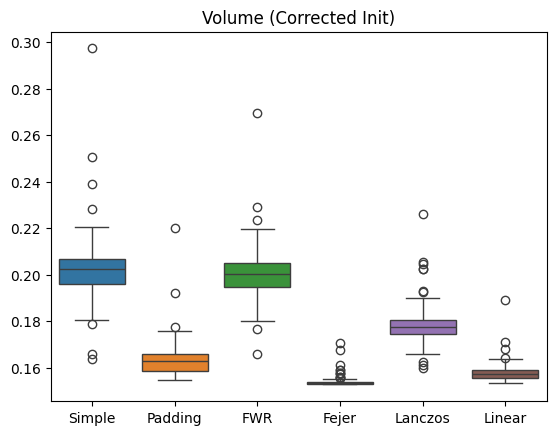

In [ ]:
col_list = ['Open', 'High', 'Low', 'Close', 'Volume']


for col in col_list:
  perf_df = pd.DataFrame()
  data_simple = corrected_init_data[col]
  data_fwr = corrected_init_fwr_data[col]
  data_lin = corrected_init_lin_data[col]
  data_fej = corrected_init_fej_data[col]
  data_lan = corrected_init_lan_data[col]
  data_pad = corrected_init_pad_data[col]

  perf_df['Simple'] = data_simple
  perf_df['Padding'] = data_pad
  perf_df['FWR'] = data_fwr
  perf_df['Fejer'] = data_fej
  perf_df['Lanczos'] = data_lan
  perf_df['Linear'] = data_lin

  print('')
  print('-'*25, col, ' (Corrected Init)', '-'*25)
  print(perf_df.median())

  plt.plot()
  plt.title(col + ' (Corrected Init)')
  sns.boxplot(perf_df)
  plt.show()